<a href="https://colab.research.google.com/github/Alitariq747/PyTorch-intro-workflow/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pytorch Workflow

Lets explore and example end-to-end pytorch workflow.

Resources:
* Book version of notebook: 'learnpytorch.io'
* Workflow notebook: `https:github.com/Alitariq747/pytorch-workflow`

In [ ]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

In [ ]:
import torch
from torch import nn # nn -> neural networks -> contains all of Pytorch's building blocks for neural networks and deep learning.
import matplotlib.pyplot as plt

# Check Pytorch version
torch.__version__

'2.1.0+cu118'

## Data (Preparing and Loading)

Data can be almost anything...in machine learning.

* Excel Spreadsheet
* Images of any kind
* Videos (Youtube has lots of data)
* Audio like songs and podcasts
* DNA
* Text

Machine Learning is a game of two parts:

1. Get the data into numerical representation. (tensors)
2. Building a model to learn patterns in that numerical representation.

To showcase this, lets create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known parameters.

In [ ]:
# Create known parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
1 / 0.02

50.0

In [ ]:
len(X), len(y)

(50, 50)

### Split data into training and test sets.

Let's create a training and test set with our data.

In [ ]:
# Create a train / test split
train_split = int(len(X) * 0.8)
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data ?
This is where the data explorer's motto comes in!
`Visualize, Visualize, Visualize`

In [ ]:
def plot_predictions(train_data = X_train, train_labels = y_train,
                     test_data = X_test, test_labels = y_test, predictions = None):

  """
  Plot training data, test data and compare predictions.
  """
  plt.figure(figsize = (10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c = 'b', s = 4, label = 'Training data')

  # Plot test data in green
  plt.scatter(test_data, test_labels, c = 'g', s = 4, label = 'Test data')

  # Are there predictions?
  if predictions is not None:
    # Plot the predictions if they exist
    plt.scatter(test_data, predictions, c = 'r', s = 4, label = 'Predictions')

  # Show the legend
  plt.legend(prop = {'size': 14});


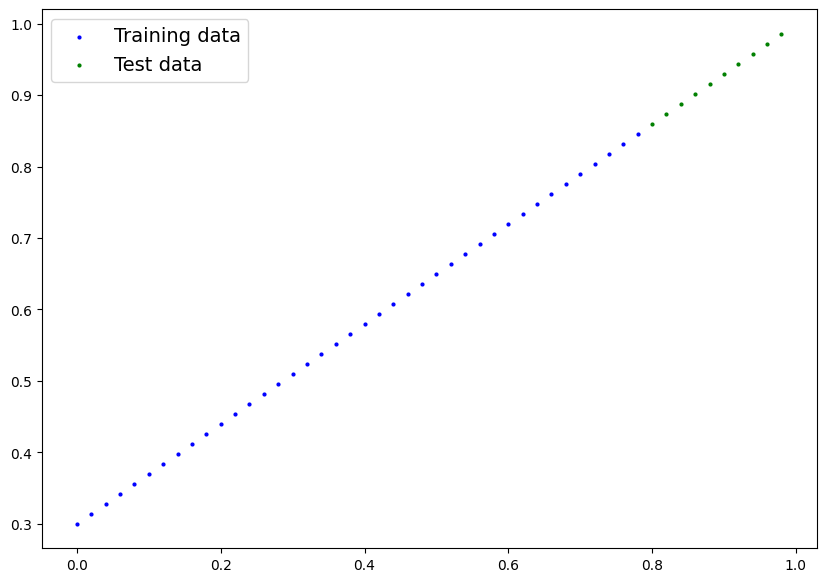

In [ ]:
plot_predictions();

## 2. Build model
Our first Pytorch model

What our model does:
* Start with random values (weight and bias)
* Look at training data and adjust the random values to better represent(or get closer to) the ideal values (the weight and bias values we used to create the data)

How does it do so ?

Through two main algorithims:
1. Gradient Descent
2. Backpropagation



In [ ]:
from torch import nn

# Create linear regression model class
class LinearRegressionModel(nn.Module): # almost everything in PyTorch inherits from nn.Module.
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                            requires_grad=True,
                                            dtype = torch.float))

    self.bias = nn.Parameter(torch.randn(1,
                                         requires_grad = True,
                                         dtype = torch.float))

    # Forward method to define the computation in the model
  def forward(self, x: torch.Tensor) -> torch.Tensor: # 'x' is input data
    return self.weights * x + self.bias # this is the Linear regression formula

An important thing to note here is if your model inherits from nn.Module you need to specify the forward method for your model. And our model when its learning its basically updating its weight and bias values to better fit the model to the data. And It does so using Gradient descent and backpropagation.

### PyTorch model building essentials

* torch.nn - contains all of the building for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters our model should try and learn, often a PyTorch layer from torch.nn will set these for us.
* torch.nn.Module - The base class for all neural networks modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Modules subclasses require you to overwrite forward(), this method defines what happens in the forward computation.

Have a look at pytorch cheatsheet.

### Checking the contents of our PyTorch model

Now we have created a model, lets see what's inside..

So we can check our model parameters or what's inside our model using .parameters().

In [ ]:
# Create a random_seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_1 = LinearRegressionModel()

# Check out the parameters
list(model_1.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# List named parameters
model_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Remember the premise of our Deep Learning; we start with random values; and from our data we alter these values to reach to the ideal values.

### Making prediction using torch.inference_mode()

To check our model's predcition power, lets see how well it predicts y_test based on x_test.

When we pass data through our model, its going to run it through the forward() method.

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

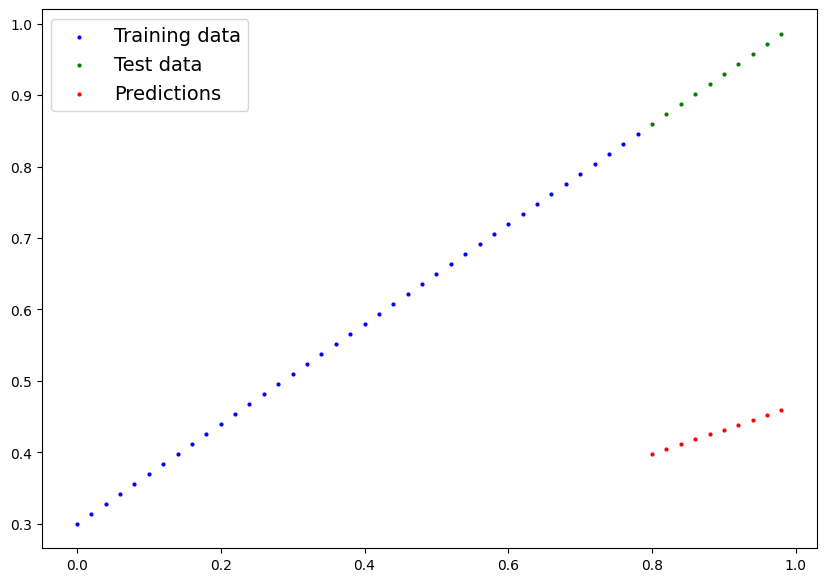

In [ ]:
plot_predictions(predictions=y_preds)

So far our model's predictions are truly random since we initialised our model with random tensors. But we'll improve that in due time..
Another important thing to note here is that **inference_mode()** or **no_grad** do the same thing but **inference_mode()** is preferred. What they do is essentially disabling gradient_descent and backpropagation for our test data set becuase these features are required for training only.

## 3.Train Model

The whole idea of training is for model to move from *unknown* parameters (these may be random) to some *known* parameters.

Or in other words from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

* Note: loss function may be called cost function or criterion in different areas. For our case, we're going to refer to it as a loss function.

Things we need to train:

* **loss function**: A function to measure how wrong your model's predictions are to the ideal output, lower is better.

* **Optimizer** Takes into account the loss of a model and adjusts the model's parameters (e.g weights and bias in our case) to improve the loss function.

And specifically for PyTorch; we need:
* A training loop
* A testing loop

In [ ]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_1.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

Learning rate is linked to parameters such that lower the lr the lower the change in parameters and vice versa at each step of learning.

In [ ]:
# Set up a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.01) # lr -> learning rate -> most important hyperparameter you can set

**Q:** Which loss function and optimizer should I use ?
**A:** This is problem specific. But with experience you'll get an idea of what works and what doesn't with your particular problem set.

For example, for a regression problem (like ours), a loss function of nn.`L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.

But for a classification problem like classifying whether a photo is of a cat or a dog, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss)

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data and...
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation. `from input layer to output layer`
2. Calculate the loss (compare forward pass predictions to ground truth labels)
3. Optimizer zero grad
4. Loss Backward - move backwards through the network to calculate the gradients of each of parameters of our model with respect to loss (**backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve loss.(**gradient descent**)

In simple terms our aim for any ML model is to reduce the gradient and resultantly loss.

In [ ]:
torch.manual_seed(42)

# An epoch is one loop through the data...(this is hyperparameter because we've set it ourselves)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

# 0. Loop through the data
for epoch in range(epochs):
  # Set the model to training mode
  model_1.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

  # 1. Forward pass
  y_pred = model_1(X_test)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_test)
  print(f'loss: {loss}')
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Perform backpropagation on the loss with respect to the parameters of the model.
  loss.backward()

  # 5. Step the optimizer (perform gradient descent)
  optimizer.step()

  model_1.eval() # turns off gradient tracking and other settings in model not needed for testing.
  with torch.inference_mode(): # turns off gradient tracking behind the scenes.

    # 1. Do the forward pass
    test_pred = model_1(X_test)

    # 2. Calculate the test loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f'Epoch: {epoch} | loss: {loss} | Test Loss: {test_loss}')

  # Print out model state_dict()
    print(model_1.state_dict())

In [ ]:
import numpy as np


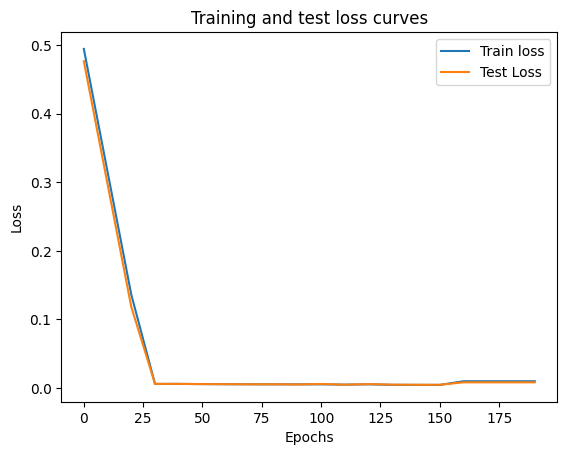

In [ ]:
# Plot the loss values
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label = 'Train loss')
plt.plot(epoch_count, test_loss_values, label = 'Test Loss')
plt.title('Training and test loss curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

In [ ]:
with torch.inference_mode():
  y_preds_new = model_1(X_test)

In [ ]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.6117])), ('bias', tensor([0.3688]))])

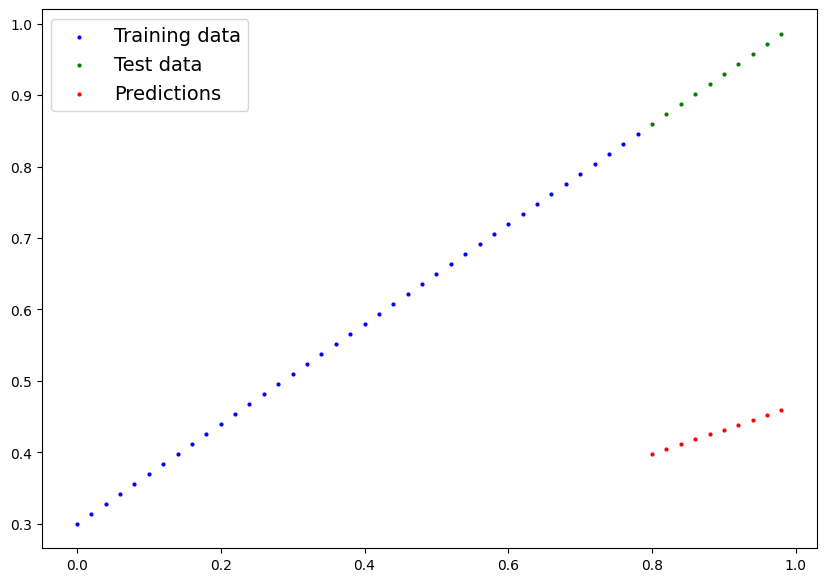

In [ ]:
plot_predictions(predictions = y_preds)

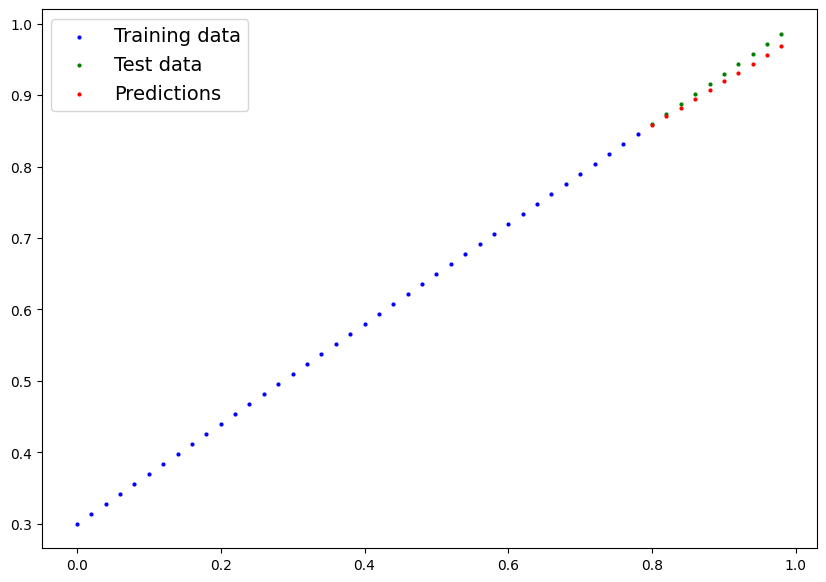

In [ ]:
plot_predictions(predictions = y_preds_new)

## Saving a model in PyTorch

There are three main methods you should go about saving and loading a models in PyTorch.

1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format.
2. `torch.load()` - allows you to load a saved PyTorch object.
3. `torch.nn.Module.load_state_dict()` - this allows to load a model's saved dictionary.

In [ ]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create a models directory
MODEL_PATH = Path('models')
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = '01_pytorch_workflow_model_0.pth' # pth is pytorch file extension
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f'Saving model to : {MODEL_SAVE_PATH}')
torch.save(obj = model_1.state_dict(), f = MODEL_SAVE_PATH)

Saving model to : models/01_pytorch_workflow_model_0.pth


## Loading a Pytorch Model
Since we saved our model's `state_dict()` rather than the entire model; we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [ ]:
model_1.state_dict()

OrderedDict([('weights', tensor([0.6117])), ('bias', tensor([0.3688]))])

In [ ]:
# To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_1 = LinearRegressionModel()

# Load the saved state_dict of model_1 (this will update the state_dict() of newly instantiated model)
loaded_model_1.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_1.state_dict()

OrderedDict([('weights', tensor([0.6117])), ('bias', tensor([0.3688]))])

In [ ]:
# MAke some predictions with our loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_1(X_test)

loaded_model_preds

tensor([[0.8582],
        [0.8704],
        [0.8827],
        [0.8949],
        [0.9071],
        [0.9194],
        [0.9316],
        [0.9438],
        [0.9561],
        [0.9683]])

In [ ]:
# Compare loaded model preds with original model preds
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## Putting it all Together
Lets go back through the steps above and see it in one place.

In [ ]:
# Import PyTorch and matplotlib
import torch
from torch import nn
import matplotlib.pyplot as plt
# Check pytorch version
torch.__version__

'2.1.0+cu118'

Create device-agnostic code

This means if we've got access to a GPU, our code will use it (for potentially faster computing).
If no GPU is available the code will default to using CPU.

In [ ]:
# Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'Using device: {device}')

Using device: cuda


### Data

In [ ]:
# Create some data using the linear regression formula of y = weight * x + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create features and labels (X and y)
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Split the data
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_test), len(X_train), len(y_train), len(y_test)

(10, 40, 40, 10)

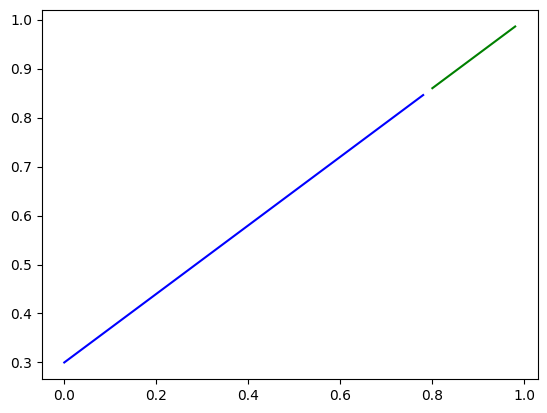

In [ ]:
# Plot the data
plt.plot(X_train, y_train, c = 'b', )
plt.plot(X_test, y_test, c = 'g')

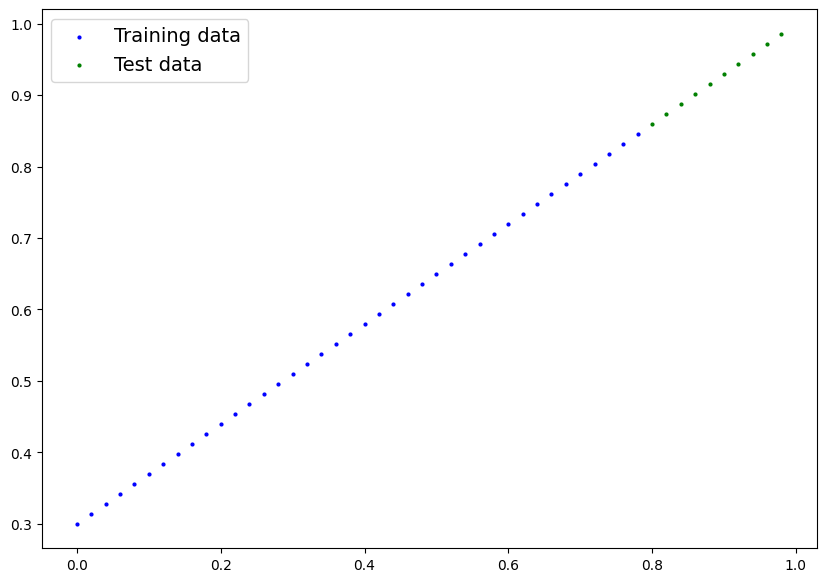

In [ ]:
# Or using our plot_predictions function
plot_predictions(X_train, y_train, X_test, y_test)

### Building a PyTorch model

In [ ]:
# Create a Linear model by. subclassing nn.module
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() for creating the model parameters / also called: linear transform.
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self, x: torch.tensor) -> torch.tensor:
    return self.linear_layer(x)

# Set up the manual seed
torch.manual_seed(42)
model_0 = LinearRegressionModelV2()
model_0, model_0.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
# Check the model current device
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
# Set the model to use the target device
model_0.to(device)
next(model_0.parameters()).device

device(type='cuda', index=0)

### Training Loop

* For training we need:
* Loss function
* Optimizer
* Training Loop
* Testing Loop

In [ ]:
# Setup loss function
loss_fn = nn.L1Loss()

# Setup our Optimizer
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01)

In [ ]:
# Lets write a training loop
torch.manual_seed(42)

epochs = 200

# Put data on the target device (device agnostic code for data)

X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)


for epoch in range(epochs):
  model_0.train()

  # 1. Forward pass
  y_pred = model_0(X_train)

  # 2. Calculate the loss
  loss = loss_fn(y_pred, y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Backpropagation
  loss.backward()

  # 5. Optimizer step
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred, y_test)

  # Print out whats happening
  if epoch % 10 == 0:
    print(f'Epoch: {epoch}, loss: {loss}, test-loss: {test_loss}')

Epoch: 0, loss: 0.5551779866218567, test-loss: 0.5739762187004089
Epoch: 10, loss: 0.439968079328537, test-loss: 0.4392664134502411
Epoch: 20, loss: 0.3247582018375397, test-loss: 0.30455657839775085
Epoch: 30, loss: 0.20954833924770355, test-loss: 0.16984669864177704
Epoch: 40, loss: 0.09433845430612564, test-loss: 0.03513690456748009
Epoch: 50, loss: 0.023886388167738914, test-loss: 0.04784907028079033
Epoch: 60, loss: 0.019956795498728752, test-loss: 0.045803118497133255
Epoch: 70, loss: 0.016517987474799156, test-loss: 0.037530567497015
Epoch: 80, loss: 0.013089174404740334, test-loss: 0.02994490973651409
Epoch: 90, loss: 0.009653178043663502, test-loss: 0.02167237363755703
Epoch: 100, loss: 0.006215683650225401, test-loss: 0.014086711220443249
Epoch: 110, loss: 0.00278724217787385, test-loss: 0.005814164876937866
Epoch: 120, loss: 0.0012645035749301314, test-loss: 0.013801801018416882
Epoch: 130, loss: 0.0012645035749301314, test-loss: 0.013801801018416882
Epoch: 140, loss: 0.0012

In [ ]:
model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

Its very importnt to set the model to evaluation mode for making predictions and testing.

In [ ]:
# Turn model into evaluation mode
model_0.eval()

# Make predictions on the test data
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

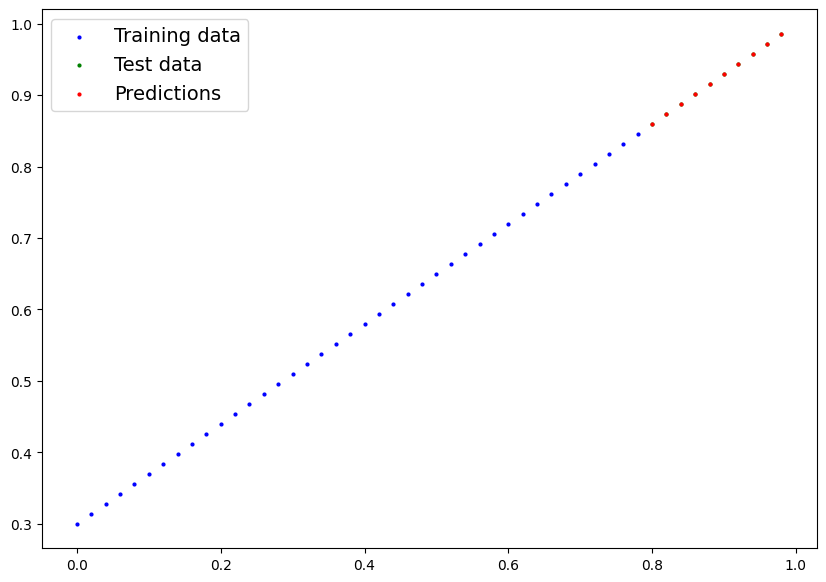

In [ ]:
# Checkout our model predictions visually
plot_predictions(predictions = y_preds.cpu())

### Saving and loading a model

In [ ]:
from pathlib import Path

model_path = Path('models')
model_path.mkdir(parents=True, exist_ok=True)

# Create model save path
model_name = '01_pyTorch_workflow_model_0.pth'
model_save_path = model_path / model_name

# Save the model save dict
print(f'Saving model to {model_save_path}')
torch.save(obj = model_0.state_dict(), f = model_save_path)

Saving model to models/01_pyTorch_workflow_model_0.pth


In [ ]:
# Load a PyTorch model

# Create a new instance of linear regression model v2

loaded_model_0 = LinearRegressionModelV2()

# Load the saved model state_dict()

loaded_model_0.load_state_dict(torch.load(model_save_path))

# Put the loaded model to device
loaded_model_0.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
next(loaded_model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

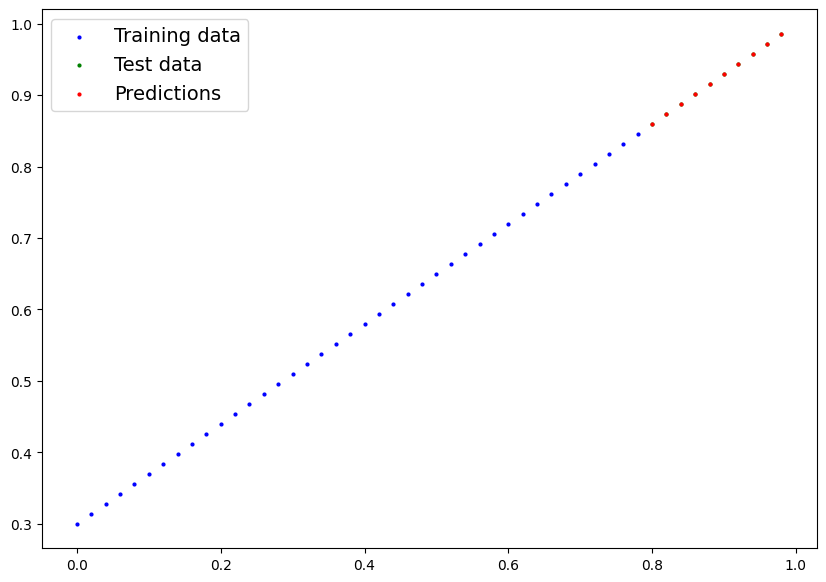

In [ ]:
# Evaluate the loaded model
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

plot_predictions(predictions = loaded_model_preds.cpu())

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')